<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

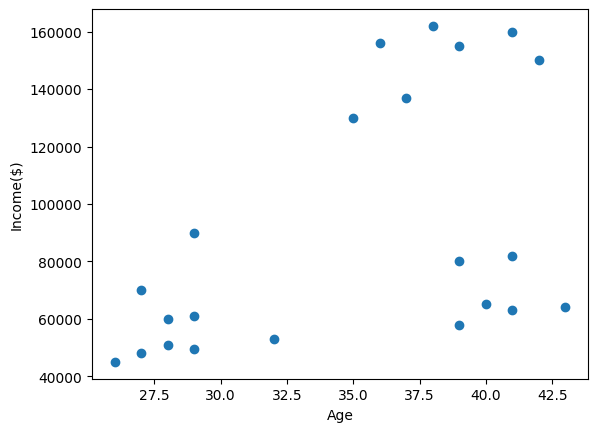

In [19]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [3]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [5]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [6]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

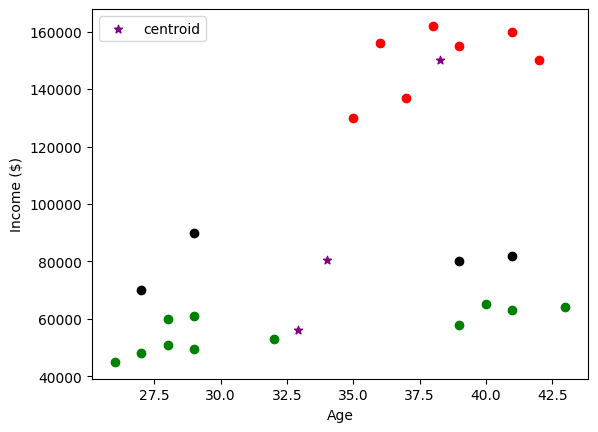

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [10]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [11]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


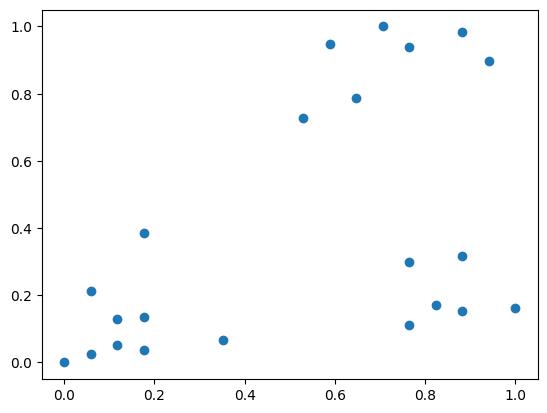

In [12]:
plt.scatter(df.Age,df['Income($)'])

In [27]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [13]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [14]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

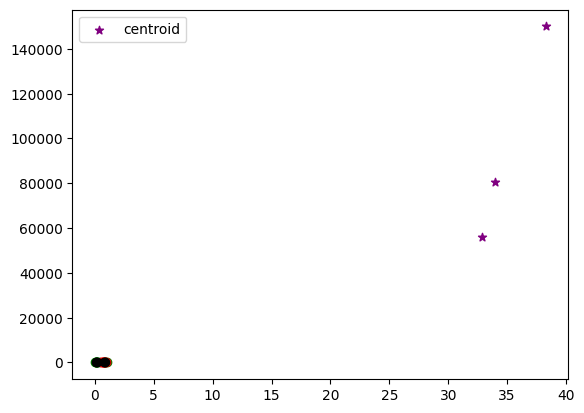

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [17]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

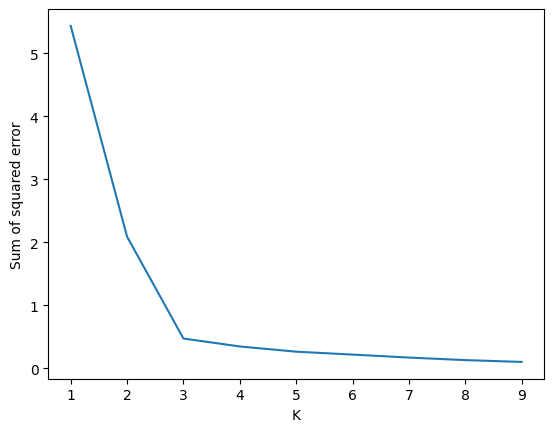

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

C:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


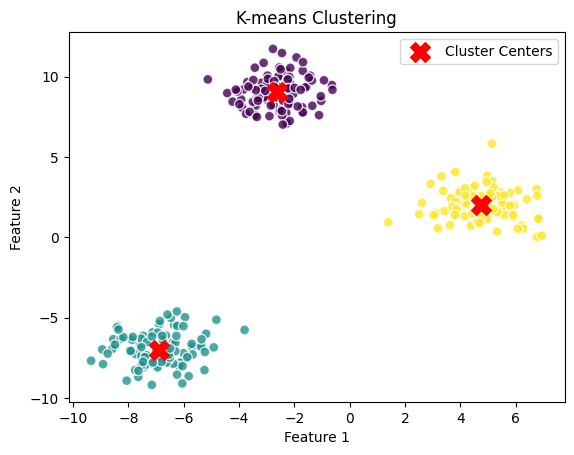

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with three clusters
data, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the data and clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8, edgecolors='w')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [28]:
from sklearn.preprocessing import OneHotEncoder

# Example DataFrame
data = {'Category': ['A', 'B', 'C', 'A', 'B', 'D', 'C', 'A', 'B', 'C']}
df = pd.DataFrame(data)

# Set the number of top categories to keep
top_n = 5

# Identify the top-N categories
top_categories = df['Category'].value_counts().nlargest(top_n).index

# Replace categories not in the top-N with a new category 'Other'
df['Category'] = np.where(df['Category'].isin(top_categories), df['Category'], 'Other')

# Perform one-hot encoding
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Category']]).toarray()

# Create a new DataFrame with the encoded features
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Category']))

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'Category' column
df = df.drop(['Category'], axis=1)

print(df)


   Category_A  Category_B  Category_C  Category_D
0         1.0         0.0         0.0         0.0
1         0.0         1.0         0.0         0.0
2         0.0         0.0         1.0         0.0
3         1.0         0.0         0.0         0.0
4         0.0         1.0         0.0         0.0
5         0.0         0.0         0.0         1.0
6         0.0         0.0         1.0         0.0
7         1.0         0.0         0.0         0.0
8         0.0         1.0         0.0         0.0
9         0.0         0.0         1.0         0.0


In [38]:
import pandas as pd
from sklearn.cluster import KMeans

# Example DataFrame
data = {'enginetype': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
        'leadtime': [10, 15, 20, 30, 40, 10, 15, 20, 30, 40]}
df = pd.DataFrame(data)

# Step 1: Group by 'enginetype' and calculate the mean of 'leadtime'
grouped_df = df.groupby('enginetype')['leadtime'].mean().reset_index()

# Step 2: Fit KMeans clustering on the 'leadtime' column
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
grouped_df['cluster'] = kmeans.fit_predict(grouped_df[['leadtime']])

# Step 3: Apply one-hot encoding to the 'cluster' column
cluster_encoded_df = pd.get_dummies(grouped_df, columns=['cluster'], prefix='cluster')

# Resulting DataFrame with reduced columns
print(cluster_encoded_df)


  enginetype  leadtime  cluster_0  cluster_1  cluster_2
0          A      10.0       True      False      False
1          B      15.0       True      False      False
2          C      20.0       True      False      False
3          D      30.0      False       True      False
4          E      40.0      False      False       True
5          F      10.0       True      False      False
6          G      15.0       True      False      False
7          H      20.0       True      False      False
8          I      30.0      False       True      False
9          J      40.0      False      False       True


C:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

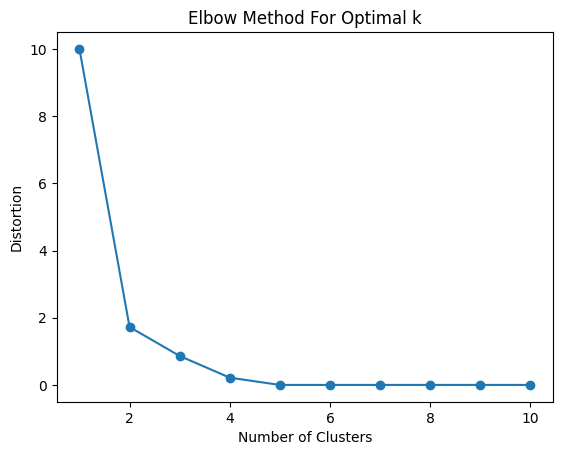

  enginetype  leadtime  leadtime_scaled  cluster_0  cluster_1  cluster_2
0          A      10.0        -1.207020       True      False      False
1          B      15.0        -0.742781       True      False      False
2          C      20.0        -0.278543       True      False      False
3          D      30.0         0.649934      False      False       True
4          E      40.0         1.578410      False       True      False
5          F      10.0        -1.207020       True      False      False
6          G      15.0        -0.742781       True      False      False
7          H      20.0        -0.278543       True      False      False
8          I      30.0         0.649934      False      False       True
9          J      40.0         1.578410      False       True      False


C:\Users\swatff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Example DataFrame
data = {'enginetype': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
        'leadtime': [10, 15, 20, 30, 40, 10, 15, 20, 30, 40]}
df = pd.DataFrame(data)

# Step 1: Group by 'enginetype' and calculate the mean of 'leadtime'
grouped_df = df.groupby('enginetype')['leadtime'].mean().reset_index()

# Standardize the 'leadtime' column
scaler = StandardScaler()
grouped_df['leadtime_scaled'] = scaler.fit_transform(grouped_df[['leadtime']])

# Step 2: Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(grouped_df[['leadtime_scaled']])
    distortions.append(kmeans.inertia_)

# Plot the elbow chart
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

# Step 3: Choose the optimal number of clusters and fit the KMeans algorithm
optimal_clusters = 3  # Replace with the optimal number from the elbow chart
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
grouped_df['cluster'] = kmeans.fit_predict(grouped_df[['leadtime_scaled']])

# Step 4: Apply one-hot encoding to the 'cluster' column
cluster_encoded_df = pd.get_dummies(grouped_df, columns=['cluster'], prefix='cluster')

# Resulting DataFrame with reduced columns
print(cluster_encoded_df)


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Example DataFrame
data = {'enginetype': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
        'leadtime': [10, 15, 20, 30, 40, 10, 15, 20, 30, 40]}
df = pd.DataFrame(data)

# Step 1: Group by 'enginetype' and calculate the mean of 'leadtime'
grouped_df = df.groupby('enginetype')['leadtime'].mean().reset_index()

# Standardize the 'leadtime' column
scaler = StandardScaler()
grouped_df['leadtime_scaled'] = scaler.fit_transform(grouped_df[['leadtime']])

# Step 2: Use yellowbrick's KElbowVisualizer to find the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11), metric='distortion', timings=False)

visualizer.fit(grouped_df[['leadtime_scaled']])
visualizer.show()

# Step 3: Choose the optimal number of clusters and fit the KMeans algorithm
optimal_clusters = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
grouped_df['cluster'] = kmeans.fit_predict(grouped_df[['leadtime_scaled']])

# Step 4: Apply one-hot encoding to the 'cluster' column
cluster_encoded_df = pd.get_dummies(grouped_df, columns=['cluster'], prefix='cluster')

# Resulting DataFrame with reduced columns
print(cluster_encoded_df)


ModuleNotFoundError: No module named 'yellowbrick'

<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k